In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [2]:
data=pd.read_csv("pima-data.csv")
data.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB


In [9]:
data.isna().any()

num_preg        False
glucose_conc    False
diastolic_bp    False
thickness       False
insulin         False
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool

In [10]:
from sklearn.model_selection import train_test_split

In [14]:
data_cp=data.drop(['diabetes'],axis=1)
X_train,X_test,y_train,y_test=train_test_split(data_cp,data["diabetes"],train_size=.8,random_state=0)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 603 to 684
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      614 non-null    int64  
 1   glucose_conc  614 non-null    int64  
 2   diastolic_bp  614 non-null    int64  
 3   thickness     614 non-null    int64  
 4   insulin       614 non-null    int64  
 5   bmi           614 non-null    float64
 6   diab_pred     614 non-null    float64
 7   age           614 non-null    int64  
 8   skin          614 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 48.0 KB


In [16]:
print(768*.8)

614.4000000000001


In [25]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

## Overfitting Example

In [35]:
model1=DecisionTreeClassifier(random_state=0)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [38]:
pred_train=model1.predict(X_train)
print("train model accuracy=",accuracy_score(y_train,pred_train)*100)
pred_test=model1.predict(X_test)
print("test model accuracy=",accuracy_score(y_test,pred_test)*100)

train model accuracy= 100.0
test model accuracy= 77.92207792207793


[Text(137.06881009615384, 209.6742857142857, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(49.29447115384615, 194.14285714285714, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(17.70576923076923, 178.61142857142858, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(9.657692307692308, 163.07999999999998, 'X[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(6.438461538461539, 147.54857142857142, 'X[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(3.2192307692307693, 132.01714285714286, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(9.657692307692308, 132.01714285714286, 'X[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(6.438461538461539, 116.48571428571428, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(12.876923076923077, 116.48571428571428, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(12.876923076923077, 147.54857142857142, 'gini = 0.0\nsamples = 1\n

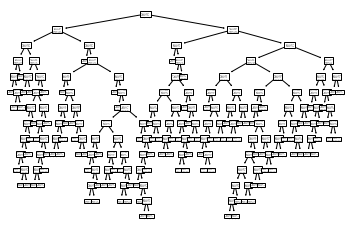

In [39]:
plot_tree(model1)

## Ideal Case

In [40]:
model2=DecisionTreeClassifier(random_state=0,max_depth=5,min_samples_leaf=20)
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20, random_state=0)

In [42]:
pred_train=model2.predict(X_train)
print("train model accuracy=",accuracy_score(y_train,pred_train)*100)
pred_test=model2.predict(X_test)
print("test model accuracy=",accuracy_score(y_test,pred_test)*100)

train model accuracy= 79.80456026058633
test model accuracy= 80.51948051948052


[Text(155.62968750000002, 199.32, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(83.7, 163.07999999999998, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(41.85, 126.83999999999999, 'X[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(20.925, 90.6, 'X[1] <= 106.5\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(10.4625, 54.359999999999985, 'gini = 0.0\nsamples = 83\nvalue = [83, 0]'),
 Text(31.387500000000003, 54.359999999999985, 'gini = 0.137\nsamples = 27\nvalue = [25, 2]'),
 Text(62.775000000000006, 90.6, 'X[2] <= 64.5\ngini = 0.287\nsamples = 92\nvalue = [76, 16]'),
 Text(52.3125, 54.359999999999985, 'gini = 0.404\nsamples = 32\nvalue = [23, 9]'),
 Text(73.2375, 54.359999999999985, 'X[5] <= 34.3\ngini = 0.206\nsamples = 60\nvalue = [53, 7]'),
 Text(62.775000000000006, 18.119999999999976, 'gini = 0.32\nsamples = 20\nvalue = [16, 4]'),
 Text(83.7, 18.119999999999976, 'gini = 0.139\nsamples = 40\nvalue = [37, 3

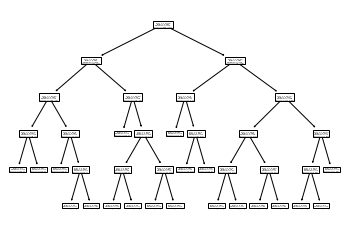

In [45]:
plot_tree(model2)

## Underfitting Example

In [47]:
model3=DecisionTreeClassifier(random_state=0,max_depth=2,min_samples_leaf=100)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=100, random_state=0)

In [48]:
pred_train=model3.predict(X_train)
print("train model accuracy=",accuracy_score(y_train,pred_train)*100)
pred_test=model3.predict(X_test)
print("test model accuracy=",accuracy_score(y_test,pred_test)*100)

train model accuracy= 73.61563517915309
test model accuracy= 76.62337662337663


[Text(167.4, 181.2, 'X[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(83.7, 108.72, 'X[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(41.85, 36.23999999999998, 'gini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.43\nsamples = 150\nvalue = [103, 47]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 151.5\ngini = 0.482\nsamples = 262\nvalue = [106, 156]'),
 Text(209.25, 36.23999999999998, 'gini = 0.498\nsamples = 157\nvalue = [83, 74]'),
 Text(292.95, 36.23999999999998, 'gini = 0.342\nsamples = 105\nvalue = [23, 82]')]

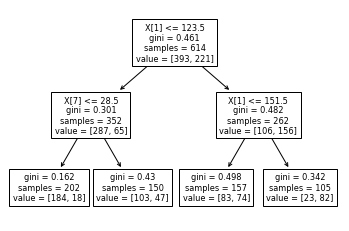

In [49]:
plot_tree(model3)